## 5.1 - Descrevendo o Problema

![ex 2.13](img/cogumelos.png)

### 5.1.1 - Classificando Cogumelos

Iremos analisar um conjunto de dados com amostras correspondentes a 23 espécies de cogumelos branqueados nos Cogumelos da Família Agaricus e Lepiota. Estes dados foram extraídos do Guia de Campo da Sociedade Audubon de Cogumelos da América do Norte (1981).

A idéia é criar um modelo de Machine Learning que consiga identificar, de acordo com as características fisiológicas do cogumelo(veja imagem abaixo), quais são as espécies venenosas.

![cog.2](img/partes_cogumelo.png)

## 5.2 - Obtendo os Dados

Clique [aqui](https://www.kaggle.com/uciml/mushroom-classification#mushrooms.csv) para fazer o download do dataset.

In [1]:
import pandas as pd

data = pd.read_csv("data/mushrooms.csv")

data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


## 5.3 - Preparando os Dados

Primeiro vamos entender quais são os tipos de dados que temos, se há valores faltantes, se há necessidade de transformar os valores de algumas variáveis, padronizar os dados, verificar se não há dependência linear entre variáveis e quais das variáveis são mais significativas.

### 5.3.1 - Analisando os Dados que Temos

In [2]:
# há dados faltantes?
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [3]:
# quais são as classes?
data['class'].unique()

array(['p', 'e'], dtype=object)

In [4]:
# e == edible == comestível
# p == poisonous == venenoso
# Quantas observações temos dentro de cada classe?
data.groupby('class').size()

class
e    4208
p    3916
dtype: int64

In [5]:
# quantas observações e variáveis temos?
data.shape

(8124, 23)

In [6]:
# quantas ob
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 5.3.2 - Transformando Strings em Números

In [7]:
# como os dados estão em string
# vamos codificá-los em números inteiros
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
    

data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


In [8]:
# temos agora e == 0 e p == 1
data.groupby('class').size()

class
0    4208
1    3916
dtype: int64

In [9]:
# separando variáveis das classes
X = data.iloc[:,1:23] # variáveis de cada observação
y = data.iloc[:, 0]  # as classes/label 

### 5.3.3 - Padronizando os Dados

In [10]:
 from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=scaler.fit_transform(X)

X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

### 5.3.4 Selecionando variáveis mais Relevantes (Feature Selection)

Precisamos remover as correlações, pois precisamos de variáveis linearmente independentes para executar operações matricias que são usadas em alguns dos modelos de ML.

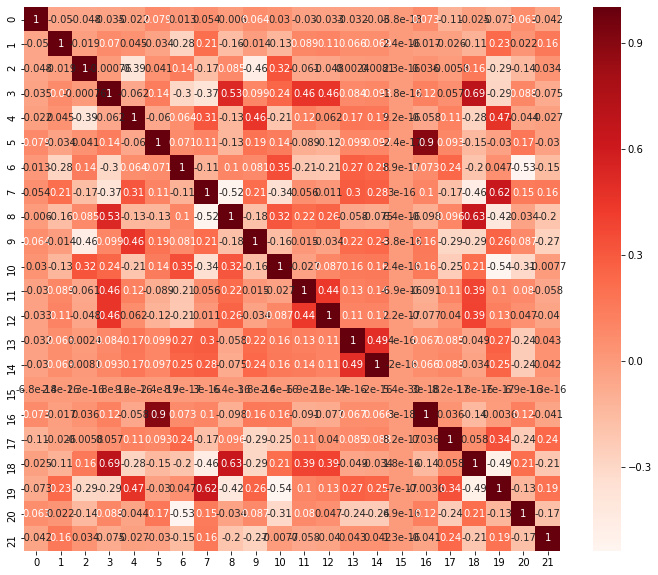

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib inline

pca = PCA()
pca.fit_transform(X)

plt.figure(figsize=(12,10))
covariance=pca.get_covariance()
sns.heatmap(covariance, annot=True, cmap=plt.cm.Reds)
plt.show()

Vamos verificar a quantidade de variância dos dados que cada componente principal consegue explicar.

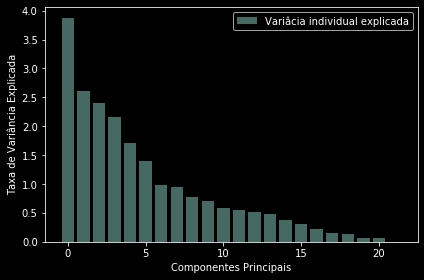

In [13]:
explained_variance=pca.explained_variance_
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='Variâcia individual explicada')
    plt.ylabel('Taxa de Variância Explicada')
    plt.xlabel('Componentes Principais')
    plt.legend(loc='best')
    plt.tight_layout()

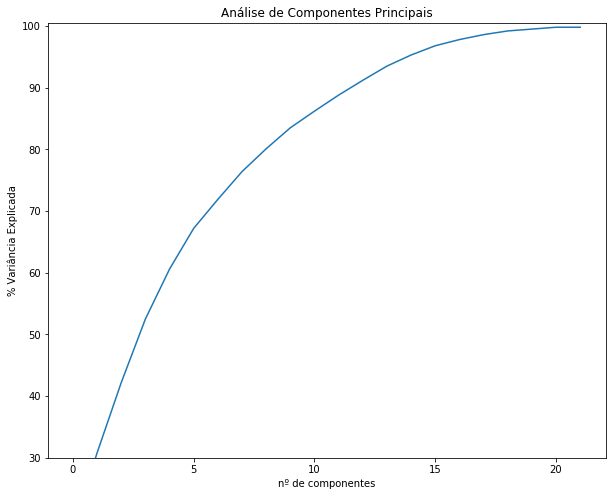

In [15]:
import numpy as np

variance = pca.explained_variance_ratio_ #calculate variance ratios

var = np.cumsum(np.round(variance, decimals=3)*100)

plt.figure(figsize=(10, 8))
plt.ylabel('% Variância Explicada')
plt.xlabel('nº de componentes')
plt.title('Análise de Componentes Principais')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var);

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Executando PCA utilizando 6 componentes com variação máxima.
pca_modified = PCA(n_components=6)
X_train = pca_modified.fit_transform(X_train)
X_test = pca_modified.transform(X_test)

## 5.4 - Testando Diferentes Algoritmos

Faz parte do processo de modelagem testar diferentes modelos para fins de comparação de permormance. Iremos testar aqui os algorítmos de classificação mais famosos que são:

* Random Forest
* XGBoost
* SVM com Kernel Linear
* Regressão Logística
* SVM com Kernel Polinomial
* SVM com Kernel Radial

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

RF = RandomForestClassifier(max_depth=2, random_state=0)
SVM_linear = svm.LinearSVC(random_state=2, C=1.0)
SVM_Polinomial = svm.SVC(kernel='poly', degree=2, coef0=0.0, random_state=2)
SVM_Radial = svm.SVC(kernel='rbf', gamma='auto', random_state=2) # ‘auto’ que usa 1 / n_features
LR= LogisticRegression()

classifiers = {"RF": RF,
               "SVM_linear": SVM_linear,
               "SVM_Polinomial": SVM_Polinomial,
               "SVM_Radial": SVM_Radial,
               "LR": LR}

/home/cloves/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Mas antes vamos criar algumas funções que nos ajudaram a extrair métricas de desempenho do modelo. 

### 5.4.1 - Funções para Extração de Métricas

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean
from statistics import stdev
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline


def metric_extration(classifier, X_train, y_train, cv=10):
    # estimativa da acurácia
    accuracy = cross_val_score(classifier, X_train, y_train, cv=cv);
    recall = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='recall');
    precision = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='precision');
    f1 = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='f1');
    print("Estimativa da Acurácia: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
    print("Estimativa da Precissão: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
    print("Estimativa do Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
    print("Estimativa de F1: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std() * 2))
    

def plot_roc_curve(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("\nMatriz de Confusão:\n")
    print(cm)
    print('\n')
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize=(10,10))
    plt.title('Curva ROC')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.xlabel('Taxa de Falso Positivo')
    plt.show()
    
    
def CV_KFolders(K, classifier_name, X, y):
    kfold = KFold(n_splits=K, shuffle=True, random_state=42)
    
    scores = []

    accuracy = []
    precision = []
    recall = []
    f1 =[]

    for train_index, test_index in kfold.split(X):   
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train = pca_modified.fit_transform(X_train)
        X_test = pca_modified.transform(X_test)

        classifier = classifiers[classifier_name]
        classifier.fit(X_train, y_train)

        # Predicting the Test set results
        if classifier_name == "LR":
            y_prob = classifier.predict_proba(X_test)[:,1]  
            y_pred = np.where(y_prob > 0.5, 1, 0)
        else:
            y_pred = classifier.predict(X_test)
            
        ac = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        re = recall_score(y_test, y_pred)
        f = f1_score(y_test, y_pred)

        accuracy.append(ac)
        precision.append(prec)
        recall.append(re)
        f1.append(f)
    
    print("\nEstamtivas usando %d-folders:\n" %int(K))
    print("Estimativa da Acurácia: %0.2f (+/- %0.2f)" % (mean(accuracy), stdev(accuracy) * 2))
    print("Estimativa da Precissão: %0.2f (+/- %0.2f)" % (mean(precision), stdev(precision) * 2))
    print("Estimativa do Recall: %0.2f (+/- %0.2f)" % (mean(recall), stdev(recall) * 2))
    print("Estimativa de F1: %0.2f (+/- %0.2f)" % (mean(f1), stdev(f1) * 2))

### 5.4.2 - Random Forest

Estimativa da Acurácia: 0.88 (+/- 0.03)
Estimativa da Precissão: 0.95 (+/- 0.03)
Estimativa do Recall: 0.79 (+/- 0.05)
Estimativa de F1: 0.86 (+/- 0.04)

Estamtivas usando 10-folders:

Estimativa da Acurácia: 0.87 (+/- 0.02)
Estimativa da Precissão: 0.94 (+/- 0.06)
Estimativa do Recall: 0.79 (+/- 0.09)
Estimativa de F1: 0.86 (+/- 0.03)

Matriz de Confusão:

[[803  42]
 [160 620]]




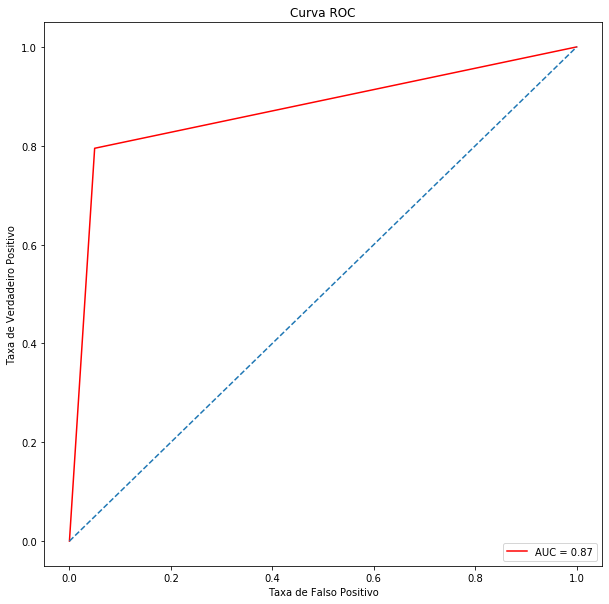

In [25]:
RF.fit(X_train, y_train)

# Predicting the Test set results
y_pred = RF.predict(X_test)

metric_extration(RF, X_train, y_train)
CV_KFolders(K=10, classifier_name="RF", X=X, y=y)

plot_roc_curve(y_test, y_pred)

### 5.4.3 - XGBoost

### 5.4.4 - SVM Linear

Estimativa da Acurácia: 0.89 (+/- 0.02)
Estimativa da Precissão: 0.93 (+/- 0.03)
Estimativa do Recall: 0.84 (+/- 0.04)
Estimativa de F1: 0.88 (+/- 0.02)

Estamtivas usando 10-folders:

Estimativa da Acurácia: 0.89 (+/- 0.01)
Estimativa da Precissão: 0.94 (+/- 0.02)
Estimativa do Recall: 0.84 (+/- 0.03)
Estimativa de F1: 0.88 (+/- 0.01)

Matriz de Confusão:

[[808  37]
 [121 659]]




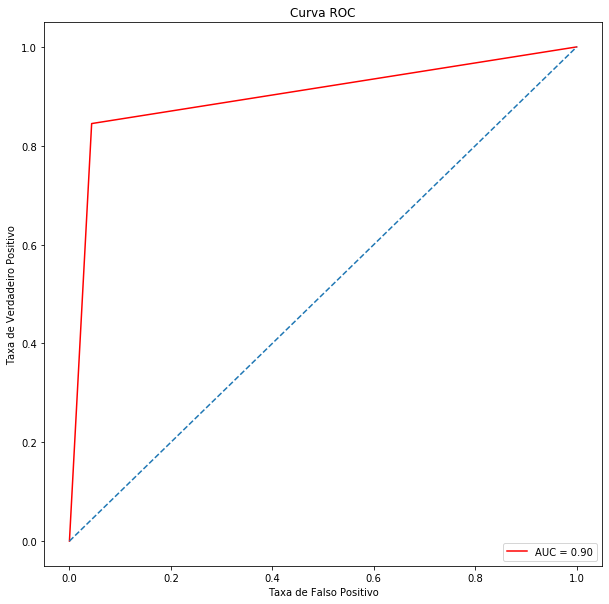

In [26]:
SVM_linear.fit(X_train, y_train)

# Predicting the Test set results
y_pred = SVM_linear.predict(X_test)

metric_extration(SVM_linear, X_train, y_train)
CV_KFolders(K=10, classifier_name="SVM_linear", X=X, y=y)
plot_roc_curve(y_test, y_pred)

### 5.4.5 - SVM Polinomial

Estimativa da Acurácia: 0.96 (+/- 0.01)
Estimativa da Precissão: 0.94 (+/- 0.02)
Estimativa do Recall: 0.97 (+/- 0.02)
Estimativa de F1: 0.96 (+/- 0.01)

Estamtivas usando 10-folders:

Estimativa da Acurácia: 0.96 (+/- 0.01)
Estimativa da Precissão: 0.95 (+/- 0.02)
Estimativa do Recall: 0.98 (+/- 0.02)
Estimativa de F1: 0.96 (+/- 0.01)

Matriz de Confusão:

[[800  45]
 [ 16 764]]




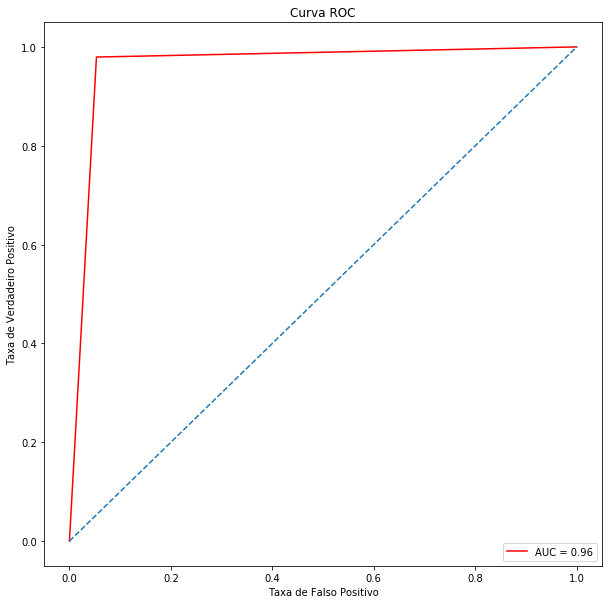

In [27]:
SVM_Polinomial.fit(X_train, y_train)

# Predicting the Test set results
y_pred = SVM_Polinomial.predict(X_test)

metric_extration(SVM_Polinomial, X_train, y_train)
CV_KFolders(K=10, classifier_name="SVM_Polinomial", X=X, y=y)
plot_roc_curve(y_test, y_pred)

### 5.4.5 - SVM Radial

Estimativa da Acurácia: 0.99 (+/- 0.01)
Estimativa da Precissão: 0.99 (+/- 0.01)
Estimativa do Recall: 0.99 (+/- 0.01)
Estimativa de F1: 0.99 (+/- 0.01)

Estamtivas usando 10-folders:

Estimativa da Acurácia: 0.99 (+/- 0.00)
Estimativa da Precissão: 1.00 (+/- 0.01)
Estimativa do Recall: 0.99 (+/- 0.01)
Estimativa de F1: 0.99 (+/- 0.00)

Matriz de Confusão:

[[836   9]
 [  7 773]]




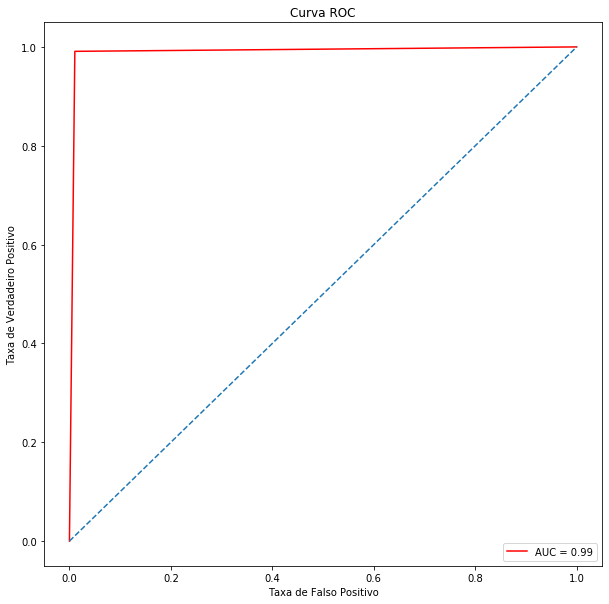

In [28]:
SVM_Radial.fit(X_train, y_train)

# Predicting the Test set results
y_pred = SVM_Radial.predict(X_test)

metric_extration(SVM_Radial, X_train, y_train)
CV_KFolders(K=10, classifier_name="SVM_Radial", X=X, y=y)
plot_roc_curve(y_test, y_pred)

### 5.4.6 - Regressão Logística

Estimativa da Acurácia: 0.90 (+/- 0.01)
Estimativa da Precissão: 0.93 (+/- 0.03)
Estimativa do Recall: 0.85 (+/- 0.03)
Estimativa de F1: 0.89 (+/- 0.01)

Matriz de Confusão:

[[803  42]
 [109 671]]




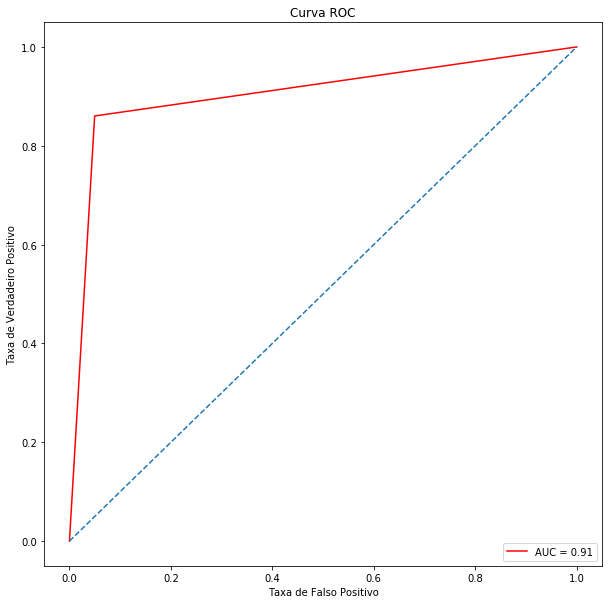

In [36]:
LR.fit(X_train,y_train)

y_prob = LR.predict_proba(X_test)[:,1]  
y_pred = np.where(y_prob > 0.5, 1, 0)
metric_extration(LR, X_train, y_train)
plot_roc_curve(y_test, y_pred)

## 5.5 - Colocando o Modelo em Produção: AWS, IBM, Google Cloud


Depois da modelagem é hora de colocar isso disponível para uso, o modelo geralmente é consumido através de uma API que está hosteada na nuvem.

A seguir vamos apresentar algumas apções de plataformas que podem ser usadas para esse propósito.

### 5.5.1 - [Amazon SageMaker](https://aws.amazon.com/pt/sagemaker/)

* [Documentação Amazon SageMaker](https://docs.aws.amazon.com/sagemaker/latest/dg/how-it-works.html)
* [Notebook Amazon SageMaker XGBoost](https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_amazon_algorithms/pca_mnist/pca_mnist.ipynb)
* [Notebook An Introduction to PCA with MNIST](https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_amazon_algorithms/pca_mnist/pca_mnist.ipynb)

### 5.5.2 -[ IBM Watson Studio](https://www.ibm.com/br-pt/cloud/watson-studio?cm_mmc=Search_Google-_-Cloud+and+Data+Platform_Data+Science-_-EP_BR-_-%2Bwatson%20%2Bstudio%20%2Bibm_b&cm_mmca1=000038LA&cm_mmca2=10012457&cm_mmca7=1001773&cm_mmca8=aud-787552595492:kwd-646909416683&cm_mmca9=CjwKCAiAh5_uBRA5EiwASW3Ian1ICGCqMdjjD4dg-TCRY1iGzzQJ34QlDkd7ommg0xKM5nU0sX-S_hoCcVIQAvD_BwE&cm_mmca10=361350328261&cm_mmca11=b&gclid=CjwKCAiAh5_uBRA5EiwASW3Ian1ICGCqMdjjD4dg-TCRY1iGzzQJ34QlDkd7ommg0xKM5nU0sX-S_hoCcVIQAvD_BwE&gclsrc=aw.ds)

* [Deploy a Python function to IBM Watson Machine Learning (MNIST tutorial)](https://github.com/SClovesgtx/curso-data-science/blob/master/material-complementar/Deploy%20a%20Python%20function%20to%20IBM%20Watson%20Machine%20Learning_MNIST%20tutorial_.ipynb)
* [Build and deploy an SMS spam classifier with Watson Machine Learning](https://github.com/SClovesgtx/curso-data-science/blob/master/material-complementar/Build%20and%20deploy%20an%20SMS%20spam%20classifier%20with%20WML.ipynb)
* [Import a Keras model into IBM Watson Machine Learning](https://github.com/SClovesgtx/curso-data-science/blob/master/material-complementar/Import%20a%20Keras%20model%20into%20IBM%20Watson%20Mac.ipynb)



### 5.5.3 - [AI Platform do Google Cloud](https://cloud.google.com/ai-platform/)

* [Running Jupyter Notebook on Google Cloud Platform in 15 min](https://towardsdatascience.com/running-jupyter-notebook-in-google-cloud-platform-in-15-min-61e16da34d52)

* [Tutoriais realacionados ao AI Platform](https://cloud.google.com/ml-engine/docs/tutorials)

### 5.5.4 - Crie Sua Própria API com Flask

* [Deploying Models to Flask](https://towardsdatascience.com/deploying-models-to-flask-fb62155ca2c4)
* [Deploy Machine Learning Model using Flask](https://www.youtube.com/watch?v=UbCWoMf80PY)